In [77]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import datetime as dt
import math
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
may = pd.read_csv('../data/may.csv/may.csv')

In [3]:
may.sumdgroup.unique()

array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [4]:
may_scooters = may.loc[may.sumdgroup.isin(['scooter', 'Scooter'])]

In [5]:
may_scooters = may_scooters[[ 'companyname', 'sumdid', 'chargelevel','pubdatetime', 'latitude', 'longitude']]

In [6]:
may_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   companyname  object 
 1   sumdid       object 
 2   chargelevel  float64
 3   pubdatetime  object 
 4   latitude     float64
 5   longitude    float64
dtypes: float64(3), object(3)
memory usage: 1.1+ GB


In [7]:
may_scooters.to_pickle("../data/may.pkl")

In [8]:
may_scooters.pubdatetime = pd.to_datetime(may_scooters.pubdatetime)

In [9]:
may_scooters.head()

,companyname,sumdid,chargelevel,pubdatetime,latitude,longitude
0,Bird,PoweredLIRL1,93.0,2019-05-01 00:01:41.247,36.136822,-86.799877
1,Bird,PoweredXWRWC,35.0,2019-05-01 00:01:41.247,36.191252,-86.772945
2,Bird,PoweredMEJEH,90.0,2019-05-01 00:01:41.247,36.144752,-86.806293
3,Bird,Powered1A7TC,88.0,2019-05-01 00:01:41.247,36.162056,-86.774688
4,Bird,Powered2TYEF,98.0,2019-05-01 00:01:41.247,36.150973,-86.783109


In [10]:
may_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   companyname  object        
 1   sumdid       object        
 2   chargelevel  float64       
 3   pubdatetime  datetime64[ns]
 4   latitude     float64       
 5   longitude    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.1+ GB


In [11]:
may_scooters['date'] = may_scooters['pubdatetime'].dt.date

In [12]:
may_scooters.date = pd.to_datetime(may_scooters.date)

To round down to closest 15, this should work

15 * math.floor(number/15)


In [13]:
may_scooters.isnull().sum()

companyname      0
sumdid           0
chargelevel    283
pubdatetime      0
latitude         0
longitude        0
date             0
dtype: int64

In [14]:
may_scooters = may_scooters.dropna()

In [18]:
may_scooters

,companyname,sumdid,chargelevel,pubdatetime,latitude,longitude,date
0,Bird,PoweredLIRL1,93.0,2019-05-01 00:01:41.247,36.136822,-86.799877,2019-05-01
1,Bird,PoweredXWRWC,35.0,2019-05-01 00:01:41.247,36.191252,-86.772945,2019-05-01
2,Bird,PoweredMEJEH,90.0,2019-05-01 00:01:41.247,36.144752,-86.806293,2019-05-01
3,Bird,Powered1A7TC,88.0,2019-05-01 00:01:41.247,36.162056,-86.774688,2019-05-01
4,Bird,Powered2TYEF,98.0,2019-05-01 00:01:41.247,36.150973,-86.783109,2019-05-01
...,...,...,...,...,...,...,...
20292498,Jump,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,2019-05-31 23:59:42.000,36.163900,-86.782300,2019-05-31
20292499,Jump,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,2019-05-31 23:59:42.000,36.160600,-86.776800,2019-05-31
20292500,Jump,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,2019-05-31 23:59:42.000,36.160600,-86.776900,2019-05-31
20292501,Jump,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,2019-05-31 23:59:42.000,36.162400,-86.774500,2019-05-31


In [16]:
may_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283299 entries, 0 to 20292502
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   companyname  object        
 1   sumdid       object        
 2   chargelevel  float64       
 3   pubdatetime  datetime64[ns]
 4   latitude     float64       
 5   longitude    float64       
 6   date         datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 1.2+ GB


In [19]:
may_scooters['date'] = may_scooters['pubdatetime'].dt.date

In [20]:
may_scooters['hour'] = may_scooters['pubdatetime'].dt.hour

In [21]:
may_scooters['minute'] = may_scooters['pubdatetime'].dt.minute

In [22]:
may_scooters.head()

,companyname,sumdid,chargelevel,pubdatetime,latitude,longitude,date,hour,minute
0,Bird,PoweredLIRL1,93.0,2019-05-01 00:01:41.247,36.136822,-86.799877,2019-05-01,0,1
1,Bird,PoweredXWRWC,35.0,2019-05-01 00:01:41.247,36.191252,-86.772945,2019-05-01,0,1
2,Bird,PoweredMEJEH,90.0,2019-05-01 00:01:41.247,36.144752,-86.806293,2019-05-01,0,1
3,Bird,Powered1A7TC,88.0,2019-05-01 00:01:41.247,36.162056,-86.774688,2019-05-01,0,1
4,Bird,Powered2TYEF,98.0,2019-05-01 00:01:41.247,36.150973,-86.783109,2019-05-01,0,1


In [23]:
may_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   companyname  object        
 1   sumdid       object        
 2   chargelevel  float64       
 3   pubdatetime  datetime64[ns]
 4   latitude     float64       
 5   longitude    float64       
 6   date         object        
 7   hour         int64         
 8   minute       int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.5+ GB


In [24]:
may_scooters['roundedtime'] = may_scooters['minute'].apply(lambda x: 15*round(x/15))

In [25]:
may_scooters = may_scooters.round({'latitude': 3})

In [26]:
may_scooters = may_scooters.round({'longitude': 3})

In [27]:
may_scooters

,companyname,sumdid,chargelevel,pubdatetime,latitude,longitude,date,hour,minute,roundedtime
0,Bird,PoweredLIRL1,93.0,2019-05-01 00:01:41.247,36.137,-86.800,2019-05-01,0,1,0
1,Bird,PoweredXWRWC,35.0,2019-05-01 00:01:41.247,36.191,-86.773,2019-05-01,0,1,0
2,Bird,PoweredMEJEH,90.0,2019-05-01 00:01:41.247,36.145,-86.806,2019-05-01,0,1,0
3,Bird,Powered1A7TC,88.0,2019-05-01 00:01:41.247,36.162,-86.775,2019-05-01,0,1,0
4,Bird,Powered2TYEF,98.0,2019-05-01 00:01:41.247,36.151,-86.783,2019-05-01,0,1,0
...,...,...,...,...,...,...,...,...,...,...
20292498,Jump,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,2019-05-31 23:59:42.000,36.164,-86.782,2019-05-31,23,59,60
20292499,Jump,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,2019-05-31 23:59:42.000,36.161,-86.777,2019-05-31,23,59,60
20292500,Jump,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,2019-05-31 23:59:42.000,36.161,-86.777,2019-05-31,23,59,60
20292501,Jump,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,2019-05-31 23:59:42.000,36.162,-86.774,2019-05-31,23,59,60


In [28]:
agg_time_scooters = may_scooters.loc[:,["latitude", "longitude", "date", "hour", "roundedtime", "sumdid"]]\
    .groupby(["latitude", "longitude", "date", "hour", "roundedtime"])\
    .agg({"sumdid": pd.Series.nunique})\
    .reset_index()


In [29]:
agg_time_scooters.head()

,latitude,longitude,date,hour,roundedtime,sumdid
0,0.0,0.0,2019-05-01,0,0,1
1,0.0,0.0,2019-05-01,0,15,1
2,0.0,0.0,2019-05-01,0,30,1
3,0.0,0.0,2019-05-01,0,45,1
4,0.0,0.0,2019-05-01,0,60,1


In [30]:
agg_time_scooters.drop(agg_time_scooters.loc[agg_time_scooters['latitude']==0].index, inplace=True)

In [31]:
agg_time_scooters

,latitude,longitude,date,hour,roundedtime,sumdid
1051,32.789,-79.940,2019-05-28,20,30,1
1052,32.789,-79.940,2019-05-28,20,45,1
1053,32.789,-79.940,2019-05-28,20,60,1
1054,32.789,-79.940,2019-05-28,21,0,1
1055,32.789,-79.940,2019-05-28,21,15,1
...,...,...,...,...,...,...
2960849,36.617,-87.285,2019-05-22,10,0,1
2960850,36.617,-87.285,2019-05-22,10,15,1
2960851,36.617,-87.285,2019-05-22,10,30,1
2960852,36.617,-87.285,2019-05-22,10,45,1


In [32]:
agg_time_scooters.sort_values('sumdid', ascending = False).head(10)

,latitude,longitude,date,hour,roundedtime,sumdid
85303,36.12,-86.753,2019-05-26,9,30,475
85302,36.12,-86.753,2019-05-26,9,15,472
85304,36.12,-86.753,2019-05-26,9,45,471
85551,36.12,-86.753,2019-05-28,11,0,471
85422,36.12,-86.753,2019-05-27,9,15,470
85308,36.12,-86.753,2019-05-26,10,30,469
85549,36.12,-86.753,2019-05-28,10,45,469
85307,36.12,-86.753,2019-05-26,10,15,468
85309,36.12,-86.753,2019-05-26,10,45,468
85306,36.12,-86.753,2019-05-26,10,0,461


In [33]:
agg_time_scooters.drop(agg_time_scooters.loc[(agg_time_scooters['latitude']==36.12) & (agg_time_scooters['longitude'] == -86.753)].index, inplace=True)

In [34]:
agg_time_scooters.drop(agg_time_scooters.loc[(agg_time_scooters['latitude']==36.12) & (agg_time_scooters['longitude'] == -86.754)].index, inplace=True)

In [35]:
agg_time_scooters.sort_values('sumdid', ascending = False).head(10000)

,latitude,longitude,date,hour,roundedtime,sumdid
104091,36.121,-86.770,2019-05-29,18,15,130
104090,36.121,-86.770,2019-05-29,18,0,129
104088,36.121,-86.770,2019-05-29,17,45,129
104089,36.121,-86.770,2019-05-29,17,60,128
104087,36.121,-86.770,2019-05-29,17,30,128
...,...,...,...,...,...,...
1903555,36.161,-86.777,2019-05-10,20,60,30
1903557,36.161,-86.777,2019-05-10,21,15,30
1968470,36.162,-86.774,2019-05-17,19,0,30
1903558,36.161,-86.777,2019-05-10,21,30,30


df= unique scooters, lat & long, date , hour, roundtime

In [36]:
agg_time_scooters.drop(agg_time_scooters.loc[agg_time_scooters['sumdid']>50].index, inplace=True)

In [37]:
agg_time_scooters.sort_values('sumdid', ascending = False)

,latitude,longitude,date,hour,roundedtime,sumdid
102465,36.121,-86.770,2019-05-16,5,0,50
1955644,36.162,-86.778,2019-05-27,15,0,50
102463,36.121,-86.770,2019-05-16,4,45,50
1845623,36.160,-86.779,2019-05-29,2,45,50
102464,36.121,-86.770,2019-05-16,4,60,50
...,...,...,...,...,...,...
1158012,36.151,-86.794,2019-05-04,15,30,1
1158007,36.151,-86.794,2019-05-04,14,30,1
1158006,36.151,-86.794,2019-05-04,13,45,1
1158005,36.151,-86.794,2019-05-04,13,30,1


In [39]:
agg_time_scooters.sort_values('sumdid', ascending = True)

,latitude,longitude,date,hour,roundedtime,sumdid
1051,32.789,-79.940,2019-05-28,20,30,1
1707547,36.158,-86.788,2019-05-19,3,0,1
1707533,36.158,-86.788,2019-05-19,0,0,1
1707532,36.158,-86.788,2019-05-18,23,60,1
1707519,36.158,-86.788,2019-05-18,21,15,1
...,...,...,...,...,...,...
2099712,36.164,-86.769,2019-05-22,11,30,50
1961293,36.162,-86.776,2019-05-15,0,30,50
2096165,36.164,-86.770,2019-05-22,18,0,50
102009,36.121,-86.770,2019-05-01,11,0,50


Create 2 dataframes: 1 weekends the other weekdays
1- reformat days to group
2

In [40]:
agg_time_scooters['date']=pd.to_datetime(agg_time_scooters.date)

In [43]:
agg_time_scooters['day_of_week'] = agg_time_scooters.date.dt.strftime("%w")

In [44]:
agg_time_scooters.head()

,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week
1051,32.789,-79.94,2019-05-28,20,30,1,2
1052,32.789,-79.94,2019-05-28,20,45,1,2
1053,32.789,-79.94,2019-05-28,20,60,1,2
1054,32.789,-79.94,2019-05-28,21,0,1,2
1055,32.789,-79.94,2019-05-28,21,15,1,2


In [56]:
agg_time_scooters['day_of_week'] = agg_time_scooters.day_of_week.astype(int)

In [110]:
weekend_scooters = agg_time_scooters[agg_time_scooters['day_of_week'].isin([6,0])]

In [111]:
weekday_scooters = agg_time_scooters[agg_time_scooters['day_of_week'].isin([1,2,3,4,5])]

In [112]:
weekend_scooters

,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week
4505,35.865,-86.343,2019-05-18,0,0,1,6
4506,35.865,-86.343,2019-05-18,0,15,1,6
4507,35.865,-86.343,2019-05-18,0,30,1,6
4508,35.865,-86.343,2019-05-18,0,45,1,6
4509,35.865,-86.343,2019-05-18,0,60,1,6
...,...,...,...,...,...,...,...
2960697,36.330,-86.619,2019-05-26,2,30,1,0
2960698,36.335,-86.909,2019-05-18,21,45,1,6
2960699,36.335,-86.909,2019-05-18,21,60,1,6
2960720,36.380,-86.777,2019-05-05,3,0,1,0


In [113]:
weekday_scooters

,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week
1051,32.789,-79.940,2019-05-28,20,30,1,2
1052,32.789,-79.940,2019-05-28,20,45,1,2
1053,32.789,-79.940,2019-05-28,20,60,1,2
1054,32.789,-79.940,2019-05-28,21,0,1,2
1055,32.789,-79.940,2019-05-28,21,15,1,2
...,...,...,...,...,...,...,...
2960849,36.617,-87.285,2019-05-22,10,0,1,3
2960850,36.617,-87.285,2019-05-22,10,15,1,3
2960851,36.617,-87.285,2019-05-22,10,30,1,3
2960852,36.617,-87.285,2019-05-22,10,45,1,3


In [114]:
agg_time_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2953477 entries, 1051 to 2960853
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   latitude     float64       
 1   longitude    float64       
 2   date         datetime64[ns]
 3   hour         int64         
 4   roundedtime  int64         
 5   sumdid       int64         
 6   day_of_week  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3)
memory usage: 169.0 MB


In [115]:
weekend_scooters['geometry'] = weekend_scooters.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)
weekend_scooters.head(3)

C:\Users\ferralme\AppData\Local\Temp/ipykernel_17868/1441982155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_scooters['geometry'] = weekend_scooters.apply(lambda x: Point((x.longitude,


,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week,geometry
4505,35.865,-86.343,2019-05-18,0,0,1,6,POINT (-86.343 35.865)
4506,35.865,-86.343,2019-05-18,0,15,1,6,POINT (-86.343 35.865)
4507,35.865,-86.343,2019-05-18,0,30,1,6,POINT (-86.343 35.865)


In [156]:
type(weekend_Scooters)

pandas.core.frame.DataFrame

In [91]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [92]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [93]:
weekend_scooters_may = gpd.GeoDataFrame(Weekend_Scooters, 
                           crs = zipcodes.crs, 
                           geometry = weekend_Scooters['geometry'])

<AxesSubplot:>

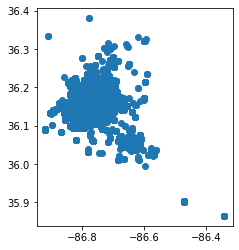

In [116]:
weekend_scooters_may.plot()

In [120]:
type(weekend_scooters_may)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

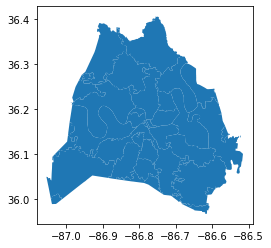

In [129]:
zipcodes.plot()

In [145]:
weekend_may_map = gpd.sjoin(weekend_scooters_may, zipcodes, op = 'within')

In [146]:
weekend_may_map.head()

,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
6753,36.010,-86.615,2019-05-11,11,45,1,6,POINT (-86.61500 36.01000),50,37086,5,LA VERGNE,36883.570021719861,29699281.948913574
6754,36.010,-86.615,2019-05-11,11,60,1,6,POINT (-86.61500 36.01000),50,37086,5,LA VERGNE,36883.570021719861,29699281.948913574
6802,36.011,-86.684,2019-05-26,5,30,2,0,POINT (-86.68400 36.01100),51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165
6803,36.011,-86.684,2019-05-26,5,45,3,0,POINT (-86.68400 36.01100),51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165
6804,36.011,-86.684,2019-05-26,5,60,3,0,POINT (-86.68400 36.01100),51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165


In [147]:
area_center = [36.23245257407244, -86.77676762469858]

AttributeError: 'Map' object has no attribute 'plot'

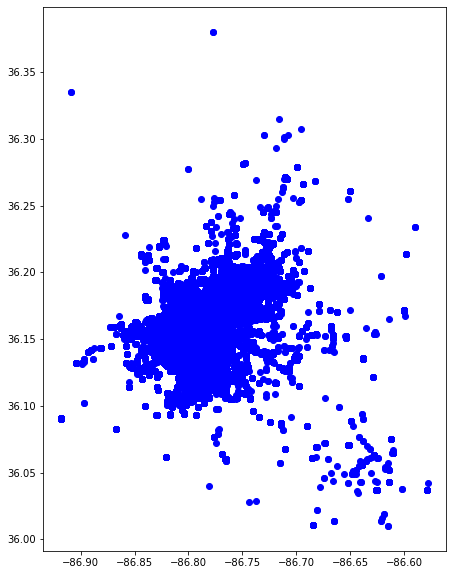

In [148]:
ax = weekend_may_map.plot(figsize = (8, 10), color = 'blue')
weekend_scooters_may_map.plot( ax = ax, column = 'geometry');
plt.show();

In [126]:
weekend_scooters_may_map = folium.Map(location =  area_center, zoom_start = 12)
weekend_scooters_may_map

In [160]:
weekend_scooters_may.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 747150 entries, 4505 to 2960721
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   latitude     747150 non-null  float64 
 1   longitude    747150 non-null  float64 
 2   date         747150 non-null  object  
 3   hour         747150 non-null  int64   
 4   roundedtime  747150 non-null  int64   
 5   sumdid       747150 non-null  int64   
 6   day_of_week  747150 non-null  int32   
 7   geometry     747150 non-null  geometry
dtypes: float64(2), geometry(1), int32(1), int64(3), object(1)
memory usage: 48.5+ MB


In [161]:
weekend_scooters_may['date'] = weekend_scooters_may.date.astype(object)

In [162]:
weekend_scooters_may.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 747150 entries, 4505 to 2960721
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   latitude     747150 non-null  float64 
 1   longitude    747150 non-null  float64 
 2   date         747150 non-null  object  
 3   hour         747150 non-null  int64   
 4   roundedtime  747150 non-null  int64   
 5   sumdid       747150 non-null  int64   
 6   day_of_week  747150 non-null  int32   
 7   geometry     747150 non-null  geometry
dtypes: float64(2), geometry(1), int32(1), int64(3), object(1)
memory usage: 48.5+ MB


In [168]:
weekend_scooters_may_map = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(weekend_scooters_may_map)

##folium.GeoJson(weekend_scooters_may).add_to(weekend_scooters_may_map)

# inside the loop add each marker to the cluster
for ind, row in weekend_scooters_may.iterrows():
    point = [row['latitude'], row['longitude']]
    message = row['sumdid']
    folium.Marker(location = point, popup = message).add_to(weekend_scooters_may_map)




    
#save an interactive HTML map by calling .save()
#cluster_map_37207.save('../maps/cluster37207.html')

weekend_scooters_may_map

In [ ]:
weekend_scooters_may_map

for ind, row in agg_time_scooters.iterrows():
    print('working on row: ', ind)
    if row['day_of_week'] >= 5:
        agg_time_scooters.loc[ind, 'Week_part'] = 'Weekend'
    elif row['day_of_week'] <= 5:
        agg_time_scooters.loc[ind, 'day_of_week'] ='Weekday'
    else:
        agg_time_scooters.loc[ind, 'day_of_week'] ='NA'
print('finished!')

pivot = pd.pivot_table(may_scooters, values = 'sumdid', index ='roundedtime', aggfunc =pd.Series.nunique)
pivot

may_scooters.companyname.value_counts()

may_scooters = may_scooters[['sumdid', 'companyname','date','time','latitude', 'longitude', 'chargelevel']]

bird_scooters_may = may_scooters.loc[may_scooters['companyname'] == 'Bird'].sum()
df.pivot(index='foo', columns='bar', values='baz')